# Importing some basic libraries

In [1]:
import warnings # For ignoring warnings
warnings.filterwarnings("ignore")

import numpy as np # Linear algebra
import pandas as pd # Data processing, csv i/p o/p
import matplotlib.pyplot as plt # Data visualization
%matplotlib inline
import seaborn as sns # Data visualization

# Loading datasets

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
print("Training Dataset shape : ", df_train.shape)
df_train.sample(5)

Training Dataset shape :  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,NaN,S


In [4]:
print("Testing Dataset shape : ", df_test.shape)
df_test.sample(5)

Testing Dataset shape :  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
277,1169,2,"Faunthorpe, Mr. Harry",male,40.0,1,0,2926,26.000,NaN,S
348,1240,2,"Giles, Mr. Ralph",male,24.0,0,0,248726,13.500,NaN,S


# Analyzing Training Data

In [5]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Attributes 
- Survival - Survival (0 = No; 1 = Yes)
- PassengerId-Passengers ID
- Class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S =  Southampton)

### Catagorical Features
#### Samples are classified into similar sets
#### Within catagorical we have Nominal, Ordinal, Ratio, Interval based 
- Survived
- Sex
- Embarked
- Pclass (Ordinal)

### Numerical Features
#### Values change from sample to sample
#### Within Numerical we have Discrete, Continuous, timeseries
- Age
- Fare
- Sibsp (Discrete)
- Parch (Discrete)

In [8]:
print('Number of Null/ Na/ Nan values in features of Train data : \n', df_train.isna().sum())
print('')
print('Number of Null/ Na/ Nan values in features of Test data : \n', df_test.isna().sum())

Number of Null/ Na/ Nan values in features of Train data : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Number of Null/ Na/ Nan values in features of Test data : 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Features containing Null or empty values
#### Training Data
Cabin > Age > Embarked

#### Testing Data
Cabin > Age

### Data typese of various features 
- Seven features are int or float, Six in case of test data.
- Five features are string(object).

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# include the object data types
df_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Beesley, Mr. Lawrence",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### About Features
- Total train samples are 891.
- Survived (Dependent Variable) is a catagorical feature of 0 or 1 values.
- About 38% survived according to the table.
- Mean age of passengers is 29.
- There were about 577 male out of 891 passengers 65%
- In Embarked there were 3 possibilities and S was used by most of them (644 out of 889)
- Unique tickets were 681 about 22% were duplicates

In [11]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Visualizing data

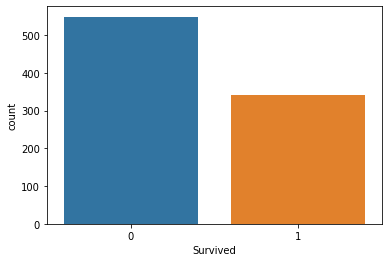

In [12]:
sns.countplot(df_train['Survived'])

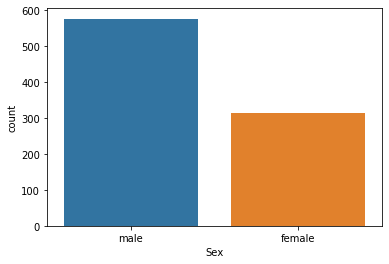

In [13]:
sns.countplot(df_train['Sex'])

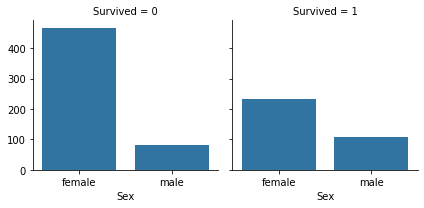

In [14]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.countplot, 'Sex')

- According to the plotted graph we can say that there are more deaths than survived.
- There are more males than females who travelled
- But the number of females survived is much more than males

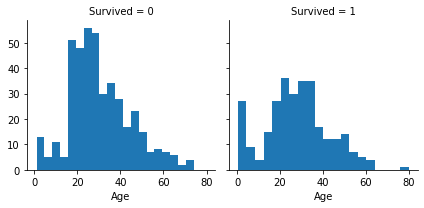

In [15]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Observations 
- Infants of age < 4 had high survival rate
- Oldest passenger survived (age = 80)
- Age 20-30 had high fatality
- Most passengers are in the range of 15-35 age

### Conclusion
- We should condider age feature in our model
- Fill the missing value in age using avg of age.

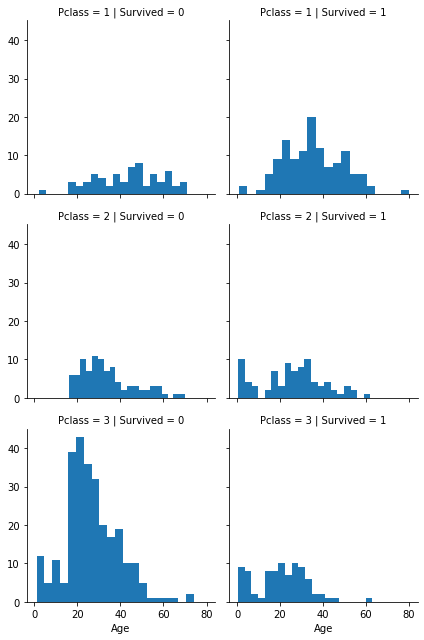

In [16]:
g = sns.FacetGrid(df_train, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=20)

### Observations
- Pclass 3 had the most number of passenger but many didnt survive
- Infants of Pclass 3 and 2 mostly survived.
- Most passenger of Pclass 1 survived

### Conclusion 
- We shold consider Pclass feature for model prediction

# Data Preprocessing

In [17]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [18]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### Feature Selection

In [19]:
print('Before Dropping Cols \nShape of Train Data : ', df_train.shape, 'Shape of Test Data : ', df_test.shape)
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
print('After Dropping Cols \nShape of Train Data : ', df_train.shape, 'Shape of Test Data : ', df_test.shape)

Before Dropping Cols 
Shape of Train Data :  (891, 12) Shape of Test Data :  (418, 11)
After Dropping Cols 
Shape of Train Data :  (891, 8) Shape of Test Data :  (418, 7)


- Dropped Columns PassendId, Name, Ticket, Cabin as they were insignificant features

In [20]:
df_train['Age'] = df_train.fillna(df_train['Age'].mean())

In [21]:
df_test['Age'] = df_test.fillna(df_test['Age'].mean())

In [22]:
df_train = df_train.dropna()
df_test = df_test.dropna()

- Filled the missing values in age with the mean of age.
- Dropped 1 col in test, and 2 in test due to missing value

In [26]:
print('After Dropping Missing values \nShape of Train Data : ', df_train.shape, 'Shape of Test Data : ', df_test.shape)

After Dropping Missing values 
Shape of Train Data :  (889, 8) Shape of Test Data :  (417, 7)


### Label Encoding
- Converting Sex and Embarked to numbers from string

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])

In [40]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0,1,0,7.2500,2
1,1,1,0,1,1,0,71.2833,0


# Model

In [37]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']
X_test = df_test.copy()
print(X_train.shape, y_train.shape, X_test.shape)

(889, 7) (889,) (417, 7)


## Importing metrics to check accuracy

In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Logistic Regression

In [ ]:
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression()
#logreg.fit(X_train, Y_train)
#y_pred = logreg.predit(X_test)